In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('DataSets/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.values.shape

(10000, 14)

<AxesSubplot:>

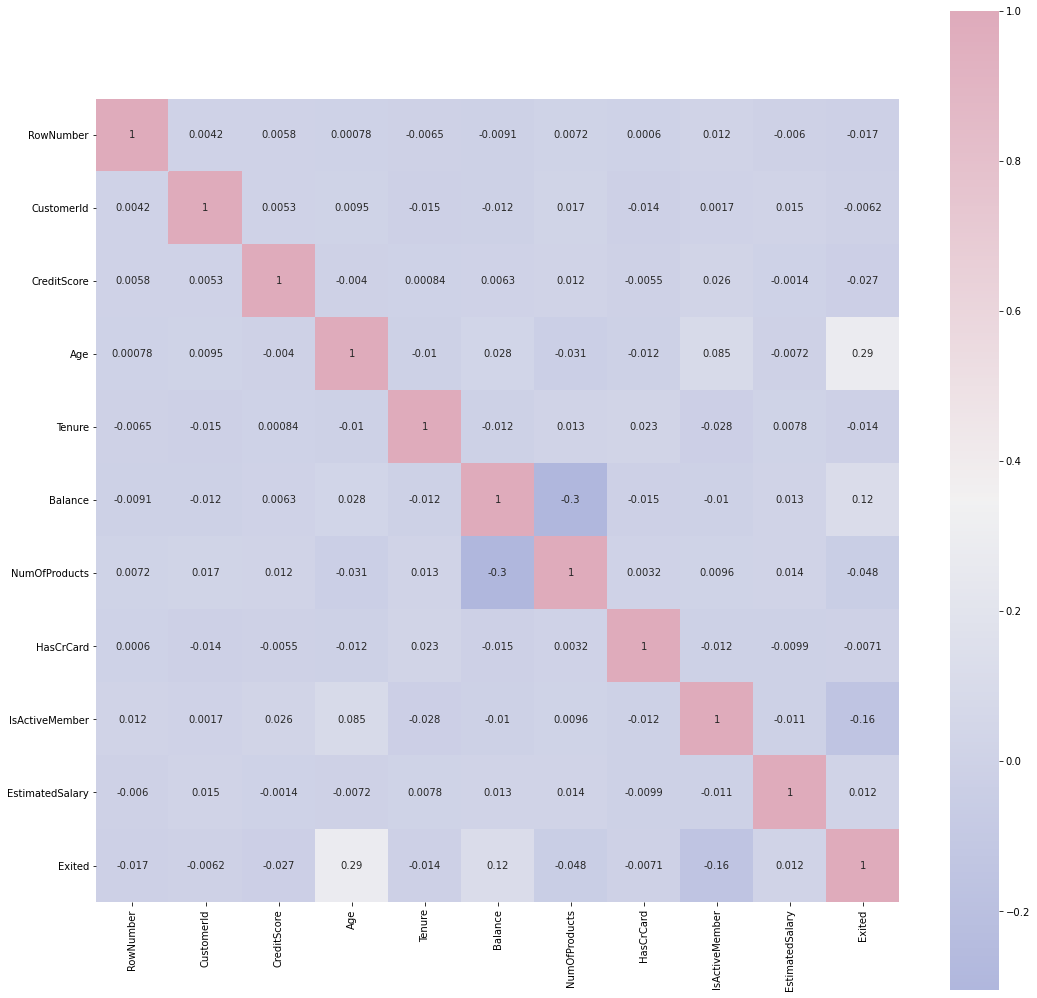

In [5]:
#korelacija podataka
corrmat = dataset.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [6]:
categorical = []
numerical = []

for feature in dataset.columns:
    if dataset[feature].dtype == 'object':
        categorical.append(feature)
    else:
        numerical.append(feature)

In [7]:
print(numerical)
print('Ukupan broj numerickih atributa:', len(numerical))

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Ukupan broj numerickih atributa: 11


In [8]:
print(categorical)
print('Ukupan broj kategorickih atributa:', len(categorical))

['Surname', 'Geography', 'Gender']
Ukupan broj kategorickih atributa: 3


Podatak koji se predvidja - exited kolona koja oznacava da li je korisnik aktuelni - vrednost 0 ili je korisnik zatvorio racun u banci - vrednost 1

<AxesSubplot:xlabel='Exited', ylabel='count'>

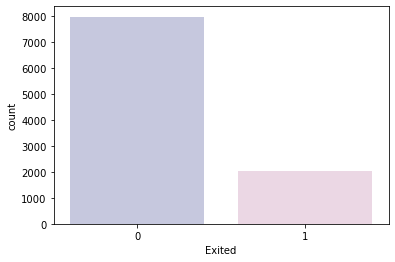

In [9]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= dataset["Exited"], palette= cols)

In [10]:
print('Broj korisnika koji je zatvorio racun:', len(dataset.loc[dataset['Exited'] == 1]))
print(f'U procentima: ', (len(dataset.loc[dataset['Exited'] == 1]) / len(dataset)) * 100, '%')

Broj korisnika koji je zatvorio racun: 2037
U procentima:  20.369999999999997 %


Skaliranje numerickih atributa i uklanjanje irelevantnih vrednosti poput rednog broja i identifikatora korisnika

In [11]:
scaler = MinMaxScaler()
numerical.remove("RowNumber")
numerical.remove("CustomerId")
numerical.remove("Exited")

for record in numerical:
    dataset[record] = scaler.fit_transform(dataset[[record]])
    
dataset[numerical].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[numerical], dataset['Exited'], test_size=0.2)

In [13]:
dataset['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [14]:
X_train.shape

(8000, 8)

In [15]:
model = Sequential([
    Dense(units=4, input_dim=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model_history = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 2s - loss: 0.5467 - accuracy: 0.7720 - val_loss: 0.5017 - val_accuracy: 0.7987
Epoch 2/20
640/640 - 0s - loss: 0.4973 - accuracy: 0.7972 - val_loss: 0.4854 - val_accuracy: 0.8000
Epoch 3/20
640/640 - 0s - loss: 0.4817 - accuracy: 0.7975 - val_loss: 0.4737 - val_accuracy: 0.7994
Epoch 4/20
640/640 - 0s - loss: 0.4716 - accuracy: 0.7977 - val_loss: 0.4650 - val_accuracy: 0.8044
Epoch 5/20
640/640 - 0s - loss: 0.4637 - accuracy: 0.7995 - val_loss: 0.4583 - val_accuracy: 0.8062
Epoch 6/20
640/640 - 0s - loss: 0.4573 - accuracy: 0.8016 - val_loss: 0.4531 - val_accuracy: 0.8062
Epoch 7/20
640/640 - 0s - loss: 0.4526 - accuracy: 0.8058 - val_loss: 0.4492 - val_accuracy: 0.8100
Epoch 8/20
640/640 - 0s - loss: 0.4483 - accuracy: 0.8086 - val_loss: 0.4465 - val_accuracy: 0.8094
Epoch 9/20
640/640 - 0s - loss: 0.4458 - accuracy: 0.8095 - val_loss: 0.4445 - val_accuracy: 0.8119
Epoch 10/20
640/640 - 0s - loss: 0.4441 - accuracy: 0.8098 - val_loss: 0.4431 - val_accuracy: 0.8138

In [18]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.7054358 ],
       [0.03751114],
       [0.22544134],
       ...,
       [0.14943206],
       [0.7194668 ],
       [0.2167733 ]], dtype=float32)

In [19]:
predicted_values = (predicted_values > 0.5)
predicted_values

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

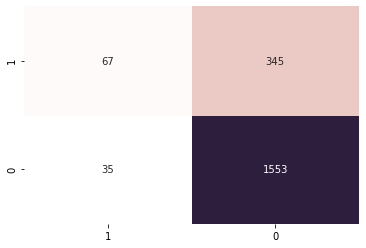

In [20]:
conf_mat = confusion_matrix(Y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=[0, 1], columns=[0, 1])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, annot=True, cbar=False, fmt='d', cmap=cmap)
h_map.invert_yaxis()
h_map.invert_xaxis()

In [21]:
class_report = classification_report(Y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1588
           1       0.66      0.16      0.26       412

    accuracy                           0.81      2000
   macro avg       0.74      0.57      0.58      2000
weighted avg       0.78      0.81      0.76      2000



In [22]:
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.81

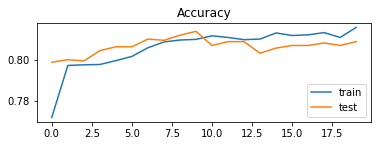

In [23]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.legend()

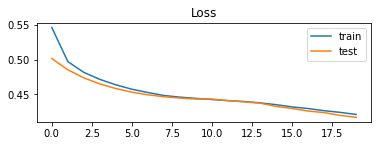

In [24]:
plt.subplot(211)
plt.title('Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()

Dodavanje jos jednog sloja u neuronskoj mrezi

In [25]:
model = Sequential([
    Dense(units=4, input_shape=(8, ), activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 1s - loss: 0.6446 - accuracy: 0.7089 - val_loss: 0.5769 - val_accuracy: 0.7981
Epoch 2/20
640/640 - 0s - loss: 0.5498 - accuracy: 0.7966 - val_loss: 0.5282 - val_accuracy: 0.7981
Epoch 3/20
640/640 - 0s - loss: 0.5195 - accuracy: 0.7966 - val_loss: 0.5103 - val_accuracy: 0.7981
Epoch 4/20
640/640 - 0s - loss: 0.5058 - accuracy: 0.7966 - val_loss: 0.4954 - val_accuracy: 0.7981
Epoch 5/20
640/640 - 0s - loss: 0.4792 - accuracy: 0.8005 - val_loss: 0.4688 - val_accuracy: 0.8025
Epoch 6/20
640/640 - 0s - loss: 0.4573 - accuracy: 0.8120 - val_loss: 0.4471 - val_accuracy: 0.8150
Epoch 7/20
640/640 - 0s - loss: 0.4401 - accuracy: 0.8245 - val_loss: 0.4311 - val_accuracy: 0.8231
Epoch 8/20
640/640 - 0s - loss: 0.4280 - accuracy: 0.8288 - val_loss: 0.4187 - val_accuracy: 0.8244
Epoch 9/20
640/640 - 0s - loss: 0.4176 - accuracy: 0.8339 - val_loss: 0.4083 - val_accuracy: 0.8269
Epoch 10/20
640/640 - 0s - loss: 0.4097 - accuracy: 0.8344 - val_loss: 0.4000 - val_accuracy: 0.8350

In [26]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.8058602 ],
       [0.059412  ],
       [0.2421093 ],
       ...,
       [0.22607878],
       [0.7485668 ],
       [0.22150752]], dtype=float32)

In [27]:
predicted_values = (predicted_values > 0.5)
accuracy = accuracy_score(Y_test, predicted_values)
accuracy

0.8375

Ubacujemo kategoricke kolone

In [28]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,2,15647311,Hill,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,3,15619304,Onio,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,4,15701354,Boni,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,5,15737888,Mitchell,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,France,Male,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0
9996,9997,15569892,Johnstone,0.332,France,Male,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0
9997,9998,15584532,Liu,0.718,France,Female,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1
9998,9999,15682355,Sabbatini,0.844,Germany,Male,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1


In [29]:
dataset['Gender'] = dataset['Gender'].replace(['Male'],int('0'))
dataset['Gender'] = dataset['Gender'].replace(['Female'],int('1'))

dataset['Geography'] = dataset['Geography'].replace(['France'],int('0'))
dataset['Geography'] = dataset['Geography'].replace(['Germany'],int('1'))
dataset['Geography'] = dataset['Geography'].replace(['Spain'],int('2'))

dataset['Geography'] = scaler.fit_transform(dataset[['Geography']])

dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.538,0.0,1,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,2,15647311,Hill,0.516,1.0,1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,3,15619304,Onio,0.304,0.0,1,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,4,15701354,Boni,0.698,0.0,1,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,5,15737888,Mitchell,1.000,1.0,1,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,0.0,0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0
9996,9997,15569892,Johnstone,0.332,0.0,0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0
9997,9998,15584532,Liu,0.718,0.0,1,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1
9998,9999,15682355,Sabbatini,0.844,0.5,0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1


In [30]:
X = dataset.iloc[:, 3:13]
Y = dataset.iloc[:, 13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,1,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,1,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,1,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,1,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341
9996,0.332,0.0,0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490
9997,0.718,0.0,1,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390
9998,0.844,0.5,0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train.shape

(8000, 10)

In [32]:
model = Sequential([
    Dense(units=5, input_shape=(10, ), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 1s - loss: 0.5322 - accuracy: 0.7647 - val_loss: 0.4942 - val_accuracy: 0.7975
Epoch 2/20
640/640 - 0s - loss: 0.4859 - accuracy: 0.7962 - val_loss: 0.4801 - val_accuracy: 0.7975
Epoch 3/20
640/640 - 0s - loss: 0.4737 - accuracy: 0.7975 - val_loss: 0.4705 - val_accuracy: 0.7981
Epoch 4/20
640/640 - 0s - loss: 0.4639 - accuracy: 0.8003 - val_loss: 0.4628 - val_accuracy: 0.8019
Epoch 5/20
640/640 - 0s - loss: 0.4549 - accuracy: 0.8027 - val_loss: 0.4547 - val_accuracy: 0.8075
Epoch 6/20
640/640 - 0s - loss: 0.4454 - accuracy: 0.8062 - val_loss: 0.4486 - val_accuracy: 0.8087
Epoch 7/20
640/640 - 0s - loss: 0.4382 - accuracy: 0.8091 - val_loss: 0.4421 - val_accuracy: 0.8112
Epoch 8/20
640/640 - 0s - loss: 0.4326 - accuracy: 0.8117 - val_loss: 0.4383 - val_accuracy: 0.8112
Epoch 9/20
640/640 - 0s - loss: 0.4283 - accuracy: 0.8109 - val_loss: 0.4346 - val_accuracy: 0.8112
Epoch 10/20
640/640 - 0s - loss: 0.4243 - accuracy: 0.8131 - val_loss: 0.4312 - val_accuracy: 0.8144

In [33]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.15627608],
       [0.4627501 ],
       [0.20821002],
       ...,
       [0.24076685],
       [0.06537887],
       [0.18724477]], dtype=float32)

In [34]:
predicted_values = (predicted_values > 0.5)
predicted_values

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

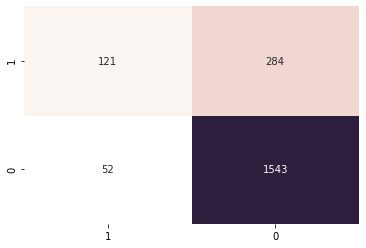

In [35]:
conf_mat = confusion_matrix(y_test, predicted_values)
conf_mat_df = pd.DataFrame(conf_mat, index=[0, 1], columns=[0, 1])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
h_map = sns.heatmap(conf_mat, annot=True, cbar=False, fmt='d', cmap=cmap)
h_map.invert_yaxis()
h_map.invert_xaxis()

In [36]:
class_report = classification_report(y_test, predicted_values)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1595
           1       0.70      0.30      0.42       405

    accuracy                           0.83      2000
   macro avg       0.77      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



In [37]:
accuracy = accuracy_score(y_test, predicted_values)
accuracy

0.832

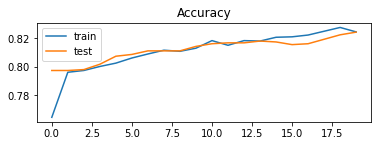

In [38]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.legend()

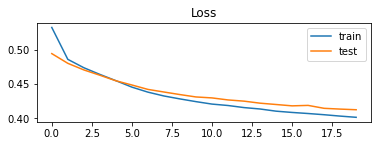

In [39]:
plt.subplot(211)
plt.title('Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()

In [41]:
model = Sequential([
    Dense(units=10, input_shape=(10, ), activation='relu'),
    Dense(units=5, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 1s - loss: 0.5291 - accuracy: 0.7759 - val_loss: 0.4981 - val_accuracy: 0.7969
Epoch 2/20
640/640 - 0s - loss: 0.4887 - accuracy: 0.7958 - val_loss: 0.4828 - val_accuracy: 0.7969
Epoch 3/20
640/640 - 0s - loss: 0.4735 - accuracy: 0.7958 - val_loss: 0.4711 - val_accuracy: 0.7969
Epoch 4/20
640/640 - 0s - loss: 0.4609 - accuracy: 0.7958 - val_loss: 0.4612 - val_accuracy: 0.7969
Epoch 5/20
640/640 - 0s - loss: 0.4515 - accuracy: 0.7958 - val_loss: 0.4530 - val_accuracy: 0.7969
Epoch 6/20
640/640 - 0s - loss: 0.4447 - accuracy: 0.7958 - val_loss: 0.4467 - val_accuracy: 0.7969
Epoch 7/20
640/640 - 0s - loss: 0.4388 - accuracy: 0.7958 - val_loss: 0.4418 - val_accuracy: 0.7969
Epoch 8/20
640/640 - 0s - loss: 0.4335 - accuracy: 0.7958 - val_loss: 0.4373 - val_accuracy: 0.7969
Epoch 9/20
640/640 - 1s - loss: 0.4283 - accuracy: 0.7958 - val_loss: 0.4319 - val_accuracy: 0.7969
Epoch 10/20
640/640 - 1s - loss: 0.4229 - accuracy: 0.7995 - val_loss: 0.4265 - val_accuracy: 0.7981

In [42]:
predicted_values = model.predict(X_test)
predicted_values = (predicted_values > 0.5)
accuracy = accuracy_score(y_test, predicted_values)
accuracy

0.8465

In [44]:
model = Sequential()
model.add(Dense(units = 10, input_shape=(10, ), activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation = 'tanh'))

model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
model_history = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
640/640 - 1s - loss: 0.4354 - accuracy: 0.7958 - val_loss: 0.4076 - val_accuracy: 0.7969
Epoch 2/20
640/640 - 1s - loss: 0.4091 - accuracy: 0.7958 - val_loss: 0.4065 - val_accuracy: 0.7969
Epoch 3/20
640/640 - 1s - loss: 0.4086 - accuracy: 0.7958 - val_loss: 0.4064 - val_accuracy: 0.7969
Epoch 4/20
640/640 - 1s - loss: 0.4085 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 5/20
640/640 - 0s - loss: 0.4085 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 6/20
640/640 - 1s - loss: 0.4085 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 7/20
640/640 - 1s - loss: 0.4085 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 8/20
640/640 - 1s - loss: 0.4084 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 9/20
640/640 - 1s - loss: 0.4084 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969
Epoch 10/20
640/640 - 1s - loss: 0.4084 - accuracy: 0.7958 - val_loss: 0.4063 - val_accuracy: 0.7969